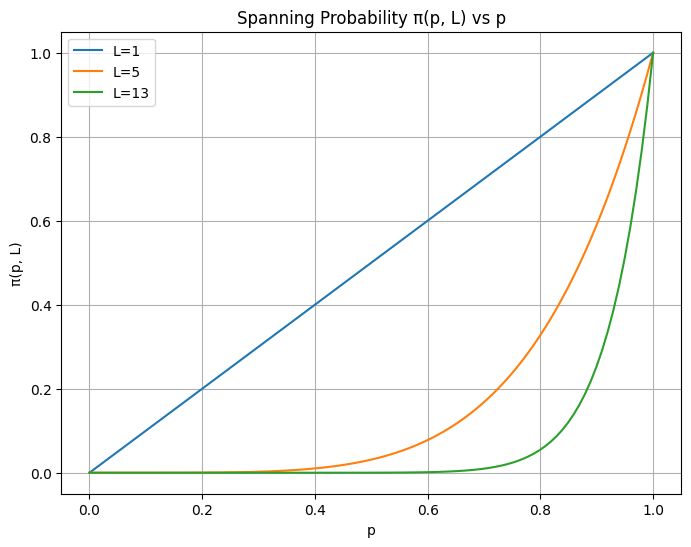

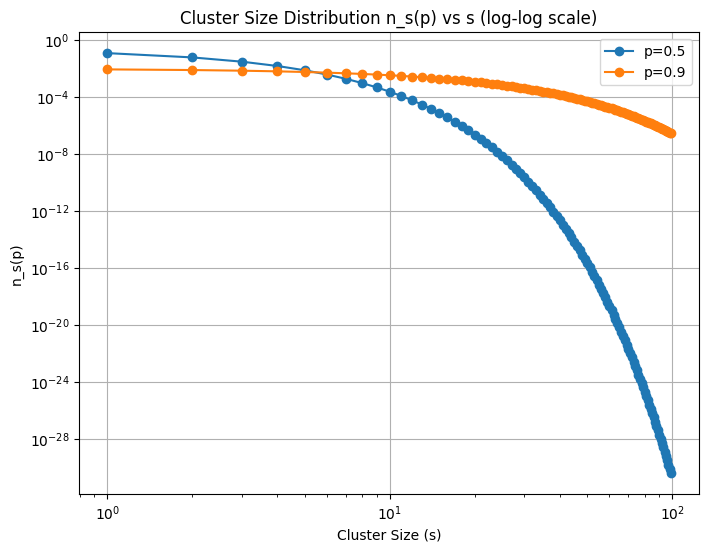

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pi_p_L(p, L):
    """Spanning probability π(p, L) = p^L"""
    return p**L

def ns_p_s(p, s):
    """Cluster size distribution n_s(p) = (1 - p)^2 * p^s"""
    return (1 - p)**2 * p**s


L_values = [1,5,13]  
p_values = np.linspace(0, 1, 100)  


plt.figure(figsize=(8, 6))
for L in L_values:
    pi_values = [pi_p_L(p, L) for p in p_values]
    plt.plot(p_values, pi_values, label=f"L={L}")

plt.xlabel("p")
plt.ylabel("π(p, L)")
plt.title("Spanning Probability π(p, L) vs p")
plt.legend()
plt.grid()
plt.show()


s_values = np.arange(1, 100) 
p_values_selected = [0.5,0.9]  

plt.figure(figsize=(8, 6))
for p in p_values_selected:
    ns_values = [ns_p_s(p, s) for s in s_values]
    plt.loglog(s_values, ns_values, marker='o', label=f"p={p}")

plt.xlabel("Cluster Size (s)")
plt.ylabel("n_s(p)")
plt.title("Cluster Size Distribution n_s(p) vs s (log-log scale)")
plt.legend()
plt.grid()
plt.show()
